# Introducción a `SymPy`

Esta introducción está basada en las [transparencias de SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf) de [J. Gross](http://www.jonathangross.de)

Véase también [Taming math and physics using SymPy](https://minireference.com/static/tutorials/sympy_tutorial.pdf), basado en [No bullshit guide to Math and Physics](https://minireference.com)

Una forma fácil de usar `SymPy` en línea es en la página de [SymPy Live](http://live.sympy.org) o bien utilizando los servicios de [sage en la nube](https://cloud.sagemath.com)





# Vamos a aprender a guarrear celdas

## Primeros pasos

### Listas

1. Una cosa

3. Se me olvidó

1. Otra cosa

Otro lista 

- uno 

- dos


### Fórmulas

Una ecuación en línea $\begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}^2+1=0$, y centrada $$\int x^2+1 \mathrm d x$$ en $\mathbb R$ y un ideal $\mathfrak u$

Para que los gráficos se incrusten en este bloc necesitamos usar el siguiente comando

In [1]:
%matplotlib inline

Con las siguientes instrucciones importamos todas las variables y métodos de `SymPy`(en algunos casos sólo importaremos los métodos y variables que nos interesen)

También se puede ejecutar en línea con `isympy`

```python
~$ isympy 
IPython console for SymPy 0.7.6.1 (Python 3.5.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org

In [1]: 
```

A partir de `Python 3` la divisón se denota por `/` y la división entera por `//`; de ahí que se use 
```
from __future__ import division
``` 
para evitar confusiones si usamos `Python 2`

In [2]:
from sympy import *

In [3]:
init_printing(use_latex=true)

## Enteros, racionales, reales y complejos

División entera

In [4]:
1//7

División real

In [5]:
1/7

In [6]:
type(1/7)

float

In [7]:
r=S("1/7")
s=S("2/3")

In [8]:
r+s

In [9]:
type(_)

sympy.core.numbers.Rational

In [11]:
2**50

Si queremos trabajar con un racional $a/b$, podemos "sympificar" la expresión "a/b"

In [12]:
a=S("1/7")

In [13]:
a.evalf(20)

In [14]:
a==Rational(1,7)

True

In [15]:
float(a)

In [16]:
a.n()

In [17]:
1+2*I

In [18]:
(I)**4

In [20]:
pi.n(150)

### Símbolos

Si intentamos evaluar alguna expresión con `x` o `y` dará un error de nombre no definido; tenemos primero que declararlos como símbolos

Esto lo hacemos con `Symbol` para una variable, o `symbols` para varios

In [21]:
i

NameError: name 'i' is not defined

In [22]:
x,y =symbols("x, y")

In [23]:
p = (x+y)**10

In [24]:
p

In [26]:
expand(p)

In [27]:
factor(x**2-y**2)

In [28]:
_.args

In [29]:
simplify(x** 2+2*x+y-2*x)

In [30]:
simplify(cos(x)**2+sin(x)**2)

In [31]:
collect(x**2+2*x*y+2*x,x)

In [32]:
(ln(x)+y).subs({x:2,y:1})

In [33]:
_.n()

In [34]:
a,b,c,d = symbols("a b c d")

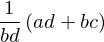

In [35]:
together(a/b+c/d)

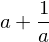

In [36]:
apart((a**2+1)/a)

In [37]:
sin(x)==cos(x-pi/2)

True

In [38]:
expand(sin(2*x))

In [39]:
expand_trig(sin(2*x))

In [40]:
trigsimp(_)

## Resolución de ecuaciones

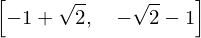

In [41]:
solve(x**2+2*x-1)

In [42]:
l=solve(a*x**2+b*x+c,x)

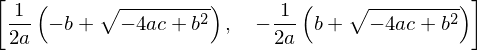

In [43]:
solve(a*x**2+b*x+c,x)

In [37]:
l[1].subs({a:1,b:2,c:-1})

-sqrt(2) - 1

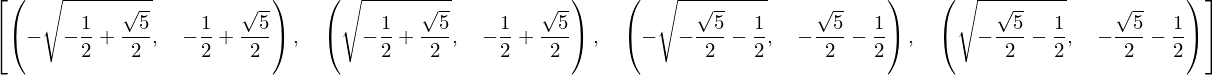

In [44]:
solve([x**2+y**2-1, y-x**2],[x,y])

In [39]:
#circun=plot_implicit(x**2+y**2-1,(x,-2,2),(y,-2,2))
#parab=plot(x**2,(x,-2,2))
#circun.extend(parab)
#circun.show()

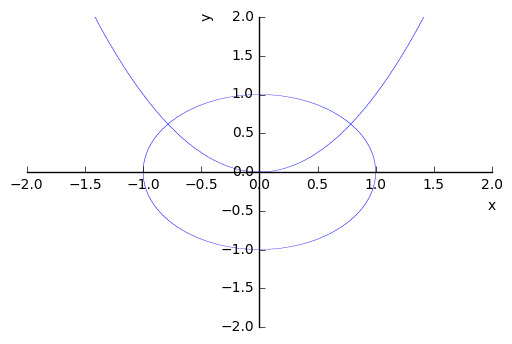

In [45]:
plot_implicit(Eq(x**2+y**2-1,0) | Eq(x**2-y,0),(x,-2,2),(y,-2,2))

## Límites

El infinito se denota por `oo` (dos oes en minúscula seguidos)

In [46]:
oo+1

In [47]:
n=Symbol("n", integer=true)

In [48]:
limit((1+1/n)**n, n, oo)

In [49]:
limit(1/x,x,0,dir="-")

In [50]:
limit(1/x,x,0,dir="+")

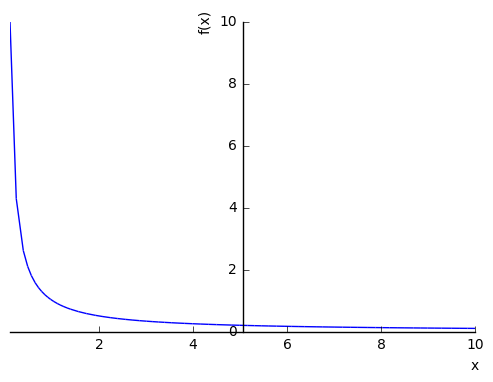

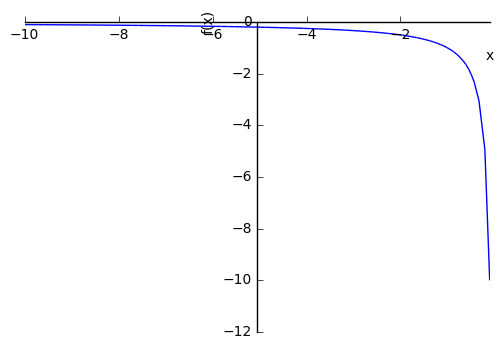

In [51]:
plot(1/x,(x,.1,10))
plot(1/x,(x,-10,-.1))

In [52]:
a_n=1/n

In [53]:
limit(1+a_n,n,oo)

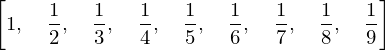

In [54]:
[a_n.subs({n:i}) for i in range(1,10)]

In [55]:
[n for n in range(19) if n%3==0]

In [56]:
[3*n for n in range(12)]

In [59]:
l=[(a,b) for a in range(3) for b in range(3) if b>a]

In [60]:
l[0]

In [61]:
l[2][1]

Y ahora como función

In [62]:
aa = lambda n:1/n

In [70]:
bb = lambda x:x[0]+x[1]

In [79]:
cc = lambda x,y : [x+y, x-y]

In [77]:
bb([1,2])

In [80]:
cc(1,2)

In [88]:
def f(n):
    """
    Prueba de ayuda
    """
    return 1/n

In [89]:
expand

In [64]:
f(2)

In [65]:
type(aa)

function

In [66]:
aa(1)

In [67]:
[aa(n) for n in range(1,10)]

In [87]:
aa?

## Derivadas

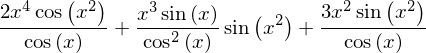

In [81]:
diff((x**3*sin(x**2))/cos(x))

In [82]:
diff((x**3*sin(x**2))/cos(x),y)

In [85]:
aa(x)

In [54]:
f=symbols("f", cls=Function)

In [55]:
dsolve(f(x)-diff(f(x),x),f(x))

Eq(f(x), C1*exp(x))

## Integrales

In [90]:
integrate(cos(x))

In [91]:
integrate(cos(x),(x,-1,1))

## Series

In [92]:
a_n = 1/n

In [94]:
summation(a_n,(n,1,oo))

In [95]:
b_n=1/factorial(n)

In [96]:
summation(b_n,(n,0,oo))

In [100]:
exp = x**n/factorial(n)

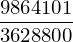

In [101]:
summation(exp.subs({x:1}),(n,0,10))

In [102]:
_.n()

In [103]:
summation(exp.subs({x:5}),(n,0,oo))

Series de Taylor (en 0, MacLaurin)

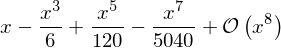

In [104]:
series(sin(x),x,0,8)

O bien en el 1

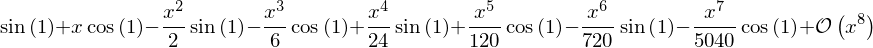

In [105]:
series(sin(x+1),x,0,8)

## Matrices (y vectores)

Las matrices se introducen for filas como una lista de listas con el comando `Matrix`
Los vectores se consideran matrices con una sola fila

In [114]:
a=Matrix([[1,1,2],[1,-1,0]])

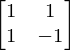

In [110]:
a

In [108]:
a.det()

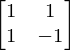

In [109]:
a.transpose()

In [111]:
pretty_print(a)

⎡1  1 ⎤
⎢     ⎥
⎣1  -1⎦


In [112]:
latex(a)

'\\left[\\begin{matrix}1 & 1\\\\1 & -1\\end{matrix}\\right]'

In [113]:
a[0,1]

In [75]:
a[0,0]

1

In [117]:
a=a[0:2,0:2]

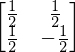

In [118]:
a.inv()

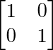

In [119]:
a.inv()*a

In [120]:
a.row(1)

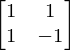

In [121]:
a

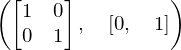

In [122]:
a.rref()

Valores propios, vectores propios y diagonalización

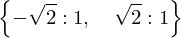

In [123]:
a.eigenvals()

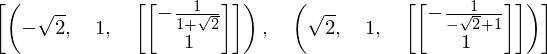

In [124]:
a.eigenvects()

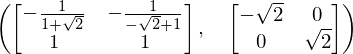

In [129]:
a.diagonalize()

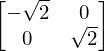

In [126]:
D

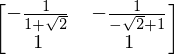

In [127]:
Q

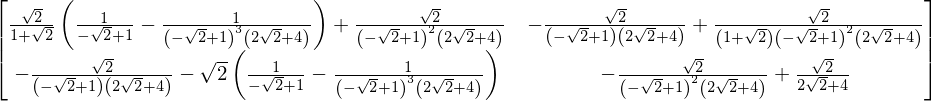

In [131]:
(Q*D*Q.inv())

In [132]:
b=Matrix([[1,3],[0,1]])

In [137]:
b.diagonalize()

MatrixError: Matrix is not diagonalizable

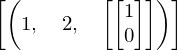

In [133]:
b.eigenvects()

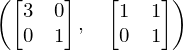

In [135]:
b.jordan_form()

La matriz indentidad tiene un función propia

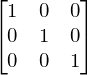

In [136]:
eye(3)

In [106]:
u=symbols("u0:3")
v=symbols("v0:3")

In [138]:
u=Matrix([[u[0],u[1],u[2]]])

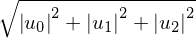

In [139]:
u.norm()

In [140]:
v=Matrix([[v[0],v[1],v[2]]])

In [141]:
u*v.T

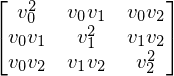

In [142]:
v.T*v

In [143]:
u.dot(v)

In [144]:
u.cross(v)

In [145]:
v.cross(u)

In [147]:
u*v

ShapeError: Matrices size mismatch.